# Suicide Rates Overview 1985 to 2016

### What is Suicide?
According to Wikipedia,Suicide is the act of intentionally causing one's own death. Mental disorders, including depression, bipolar disorder, schizophrenia, personality disorders, anxiety disorders, and substance abuse—including alcoholism and the use of benzodiazepines—are risk factors. Some suicides are impulsive acts due to stress, such as from financial difficulties, troubles with relationships, or bullying. Those who have previously attempted suicide are at a higher risk for future attempts.

### What is our Job?
As Data Scientist, My job is will be to analysis the data which we have been provided and find out the answer to the following question
1. Which Country has Most number of Suicide in past 21 Year?
2. Which Year had the Maximum number of Suicide?
3. Which of the following age-group have more suicide?
4. What the difference between Suicide rate between male and female over the period of years?
4. Does suicide affected growth of country?
5. How has the GPD and HDI been affected with increase or decrease in population?

# Let's Begain our EDA

In [1]:
# Import all the needed python libary for data visualtion and Analysis
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/master.csv')

In [3]:
# Check the Data Infomation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
print(data.columns)
data.columns = ['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       'gdp_for_year', 'gdp_per_capita', 'generation']

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [5]:
data.corr()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.366786,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.151399,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.102943,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.074279,0.001785
HDI for year,0.366786,0.151399,0.102943,0.074279,1.000000,0.771228
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,0.771228,1.000000


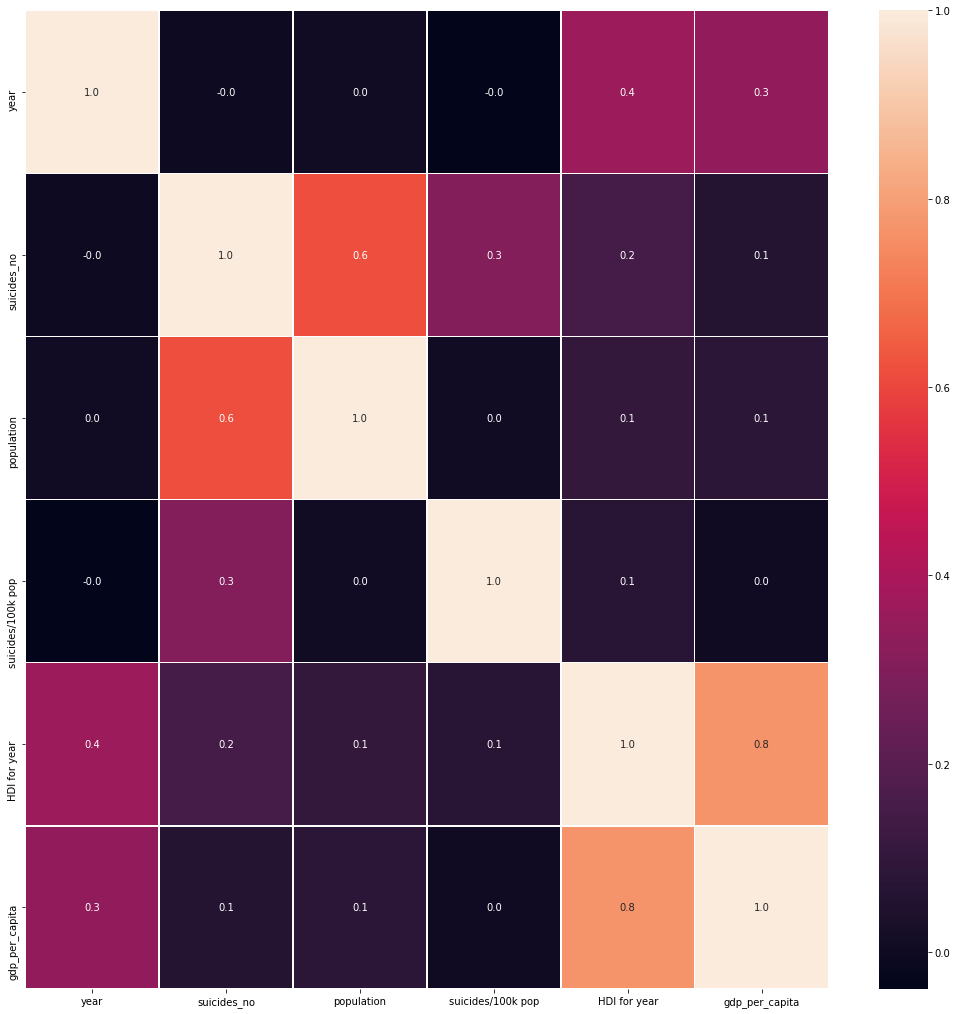

In [6]:
# Correlation Map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)
plt.show()

In [7]:
# Check the first 10 Record
data.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [8]:
# Check the last 10 Record
data.tail(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year,gdp_per_capita,generation
27810,Uzbekistan,2014,female,15-24 years,347,2992817,11.59,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27811,Uzbekistan,2014,male,55-74 years,144,1271111,11.33,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers
27812,Uzbekistan,2014,male,15-24 years,347,3126905,11.10,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27813,Uzbekistan,2014,male,75+ years,17,224995,7.56,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27814,Uzbekistan,2014,female,25-34 years,162,2735238,5.92,Uzbekistan2014,0.675,"63,067,077,179",2309,Millenials
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


In [9]:
# Check all Country in the dataset
data.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [10]:
data.country.nunique()

101

In [11]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [12]:
data.describe(include='object')

,country,sex,age,country-year,gdp_for_year,generation
count,27820,27820,27820,27820,27820,27820
unique,101,2,6,2321,2321,6
top,Mauritius,female,15-24 years,Republic of Korea2005,"2,727,507,213",Generation X
freq,382,13910,4642,12,12,6408


In [13]:
data.isnull().sum()

country                  0
year                     0
sex                      0
age                      0
suicides_no              0
population               0
suicides/100k pop        0
country-year             0
HDI for year         19456
gdp_for_year             0
gdp_per_capita           0
generation               0
dtype: int64

In [14]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

# What we done so far?

We have done the initial data exploring in which we found out the following deatils:

* There are 101 Country data in the Data Set.
* We have data from 1985 to 2016.
* There is a strong correction between Population and Suicide No
* There is a strong correction between GDP and HDI for year
* We have HDI for year missing for 19456 Data
* We have 27820 Rows in our Data Set
* We have 19456 record missing in HDI which will be replace with 0
* Age Group are divided in 6 Bin

# Impute Missing Value

As HDI was have some missing record we have imputed value 0 for all missing value in HDI

In [15]:
# Before we explore the data let us fill the HDI with 0
data.fillna(0, axis=1, inplace=True)

In [16]:
data.isnull().sum()

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
country-year         0
HDI for year         0
gdp_for_year         0
gdp_per_capita       0
generation           0
dtype: int64

# Let's Find out answer to our question

#### 1. Which Country has Most number of Suicide in past 21 Year?



In [17]:
grouped = data.groupby(['country',])['suicides_no'].sum().reset_index()
grouped = grouped.sort_values('suicides_no', ascending=False)
grouped = grouped[:10]

Text(0, 0.5, 'Number of Suicide')

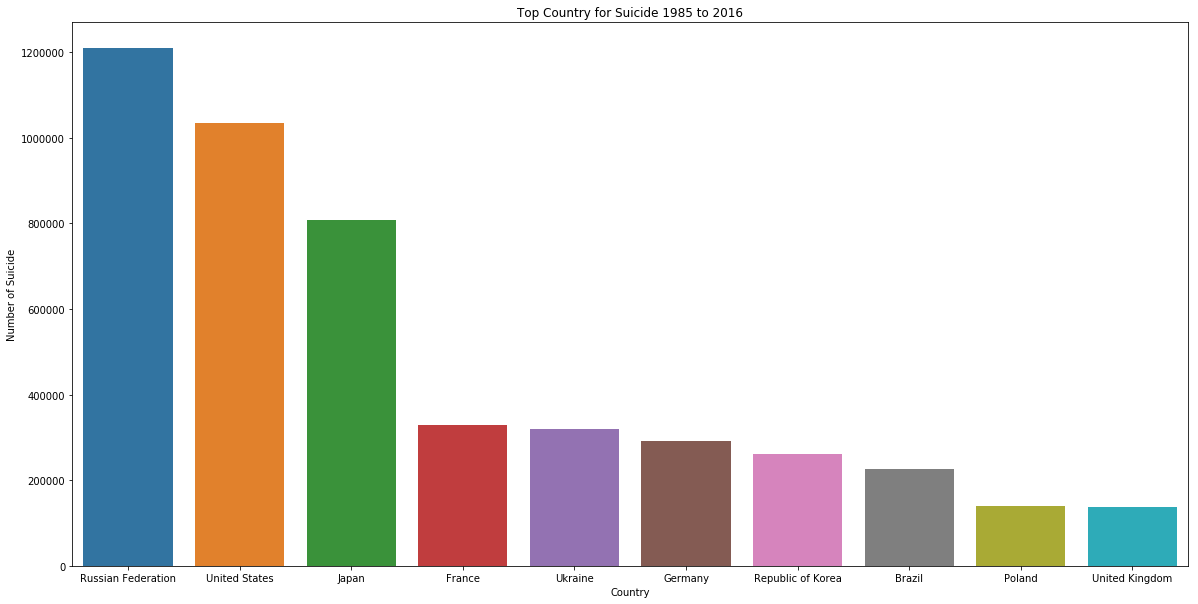

In [18]:
f,ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='country', y='suicides_no', data=grouped)
plt.title('Top Country for Suicide 1985 to 2016')
plt.xlabel('Country')
plt.ylabel('Number of Suicide')

### Answer

By Looking at the Graph we can say Russian Federation, United States and Japan are top 3 country for Suicide.

But if we look at the data more precisely we can see that there is numerical variable "suicides/100k pop" which is basically 
total number of sucide / 100K Population. Let us explore that and also is Russia the country with Maximum Sucide or not?

In [19]:
grouped = data.groupby(['country',])['suicides_no', 'population'].sum().reset_index()
grouped['Suicide / Population'] = grouped['suicides_no'] / grouped['population']
grouped = grouped.sort_values('Suicide / Population', ascending=False)
grouped = grouped[:10]
grouped

,country,suicides_no,population,Suicide / Population
52,Lithuania,28039,68085210,0.000412
75,Russian Federation,1209742,3690802620,0.000328
87,Sri Lanka,55641,182525626,0.000305
11,Belarus,59892,197372292,0.000303
40,Hungary,73891,248644256,0.000297
51,Latvia,12770,44852640,0.000285
47,Kazakhstan,101546,377513869,0.000269
84,Slovenia,10615,40268619,0.000264
30,Estonia,7034,27090810,0.000260
95,Ukraine,319950,1286469184,0.000249


Text(0, 0.5, 'Sucide / Population')

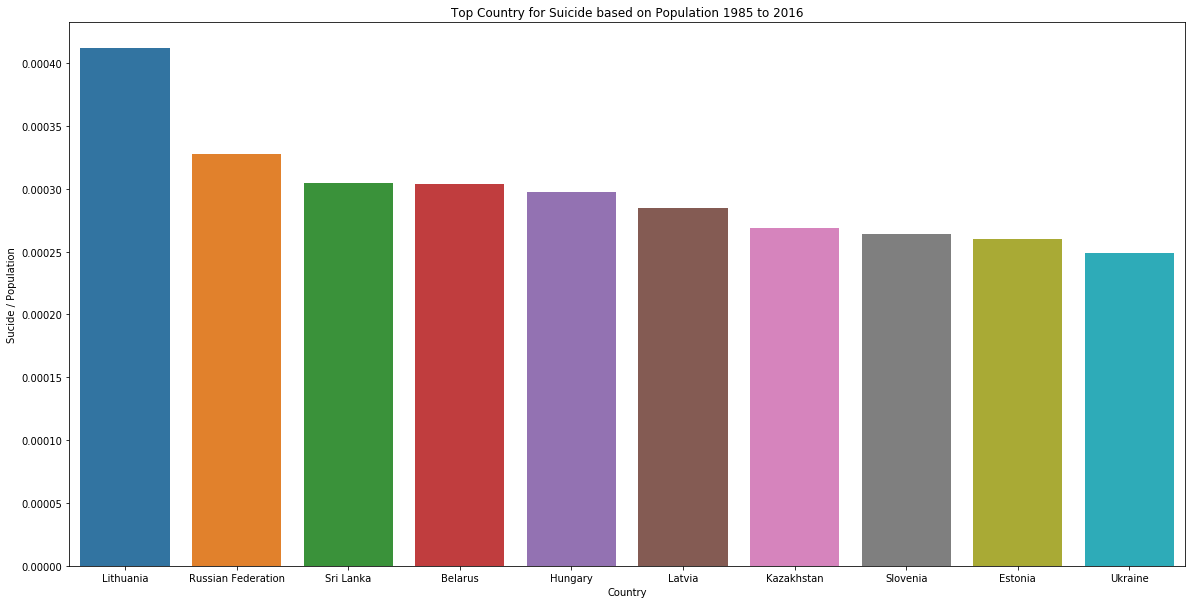

In [20]:
f,ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='country', y='Suicide / Population', data=grouped)
plt.title('Top Country for Suicide based on Population 1985 to 2016')
plt.xlabel('Country')
plt.ylabel('Sucide / Population')

We can conclude, if we just consider total number sucide in the country that happen between 1985 to 2016, then Russia top in number, but if we consider the same looking at the total population of the country, then Lithuania is the country with more sucide.

#### 2. Which are the top most year with maximum suicide?


In [21]:
grouped = data.groupby('year')['suicides_no'].sum().reset_index()
grouped = grouped.sort_values('suicides_no', ascending=False).reset_index(drop=True)
grouped = grouped[:10]
grouped

,year,suicides_no
0,1999,256119
1,2002,256095
2,2003,256079
3,2000,255832
4,2001,250652
5,1998,249591
6,1996,246725
7,1995,243544
8,2009,243487
9,2004,240861


Text(0, 0.5, 'Number of Suicide')

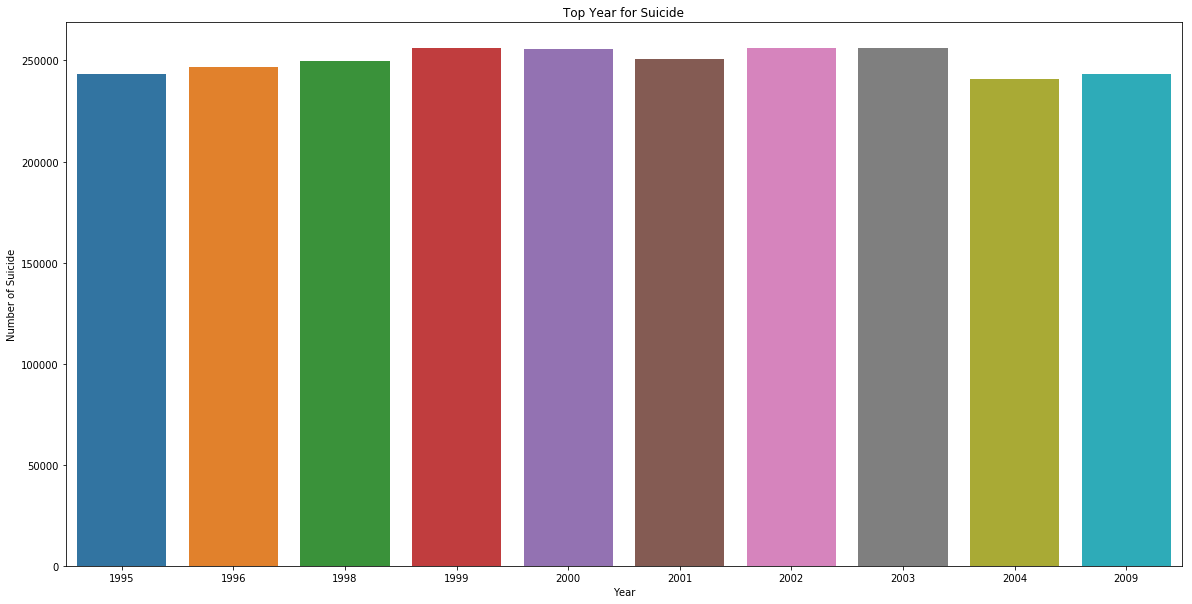

In [22]:
f,ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='year', y='suicides_no', data=grouped)
plt.title('Top Year for Suicide')
plt.xlabel('Year')
plt.ylabel('Number of Suicide')

By Looking at Table and Graph we can say that year 1999 there more number of suicide.

#### 3. Which of the following age-group have more suicide?

In [23]:
grouped = data.groupby(['age'])['suicides_no'].sum().reset_index()
grouped = grouped.sort_values('suicides_no', ascending=False).reset_index(drop=True)
grouped

,age,suicides_no
0,35-54 years,2452141
1,55-74 years,1658443
2,25-34 years,1123912
3,15-24 years,808542
4,75+ years,653118
5,5-14 years,52264


Text(0, 0.5, 'Number of Suicide')

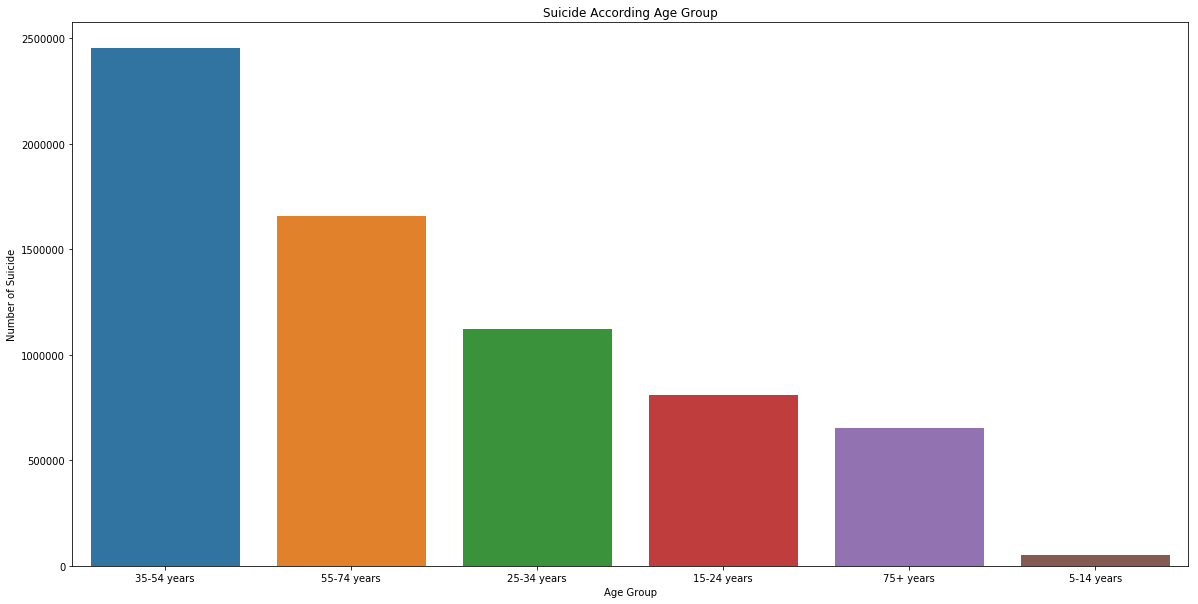

In [24]:
f,ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='age', y='suicides_no', data=grouped)
plt.title('Suicide According Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Suicide')

Age Group between years 35 to 54 have maximum rate of suicide.

#### 4. What the differnce between Suicide rate between male and female over the period of years?

Text(0.5, 1.0, 'Genderwise Suicide Comparison')

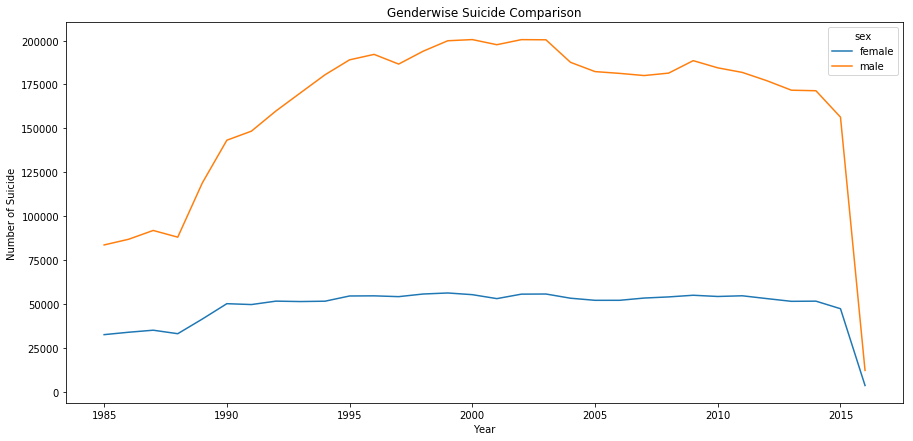

In [25]:
fig, ax = plt.subplots(figsize=(15,7))
grouped = data.groupby(['year', 'sex'])['suicides_no'].sum().unstack().plot(ax=ax)
plt.xlabel('Year')
plt.ylabel('Number of Suicide')
plt.title('Genderwise Suicide Comparison')

Looking at the graph above we can say that there are most number of suicide done by Male rather Female over a period of time.

#### 5. Does Suicide affects Growth of Country?

We need to check that is there a relationship between Suicide and GPD. The best way to check for same will be to check correlation for Suicide and GDP are they linear realted or not.

To check correlation we can check using `pandas.Series.corr()`.

In [26]:
data.corr()['suicides_no']

year                -0.004546
suicides_no          1.000000
population           0.616162
suicides/100k pop    0.306604
HDI for year        -0.017308
gdp_per_capita       0.061330
Name: suicides_no, dtype: float64

Using the correction `.corr()` function on the DataFrame, we will get the Pearson correlation and we see that there no significance impact on `gdp_per_capita` as `suicide_no` is not Linearly related.

#### 6. How has the GPD and HDI been affected with increase or decrease in population?

Again to check how population affect HDI and GDP we will check the correction between the 3 variable.

In [27]:
data.corr()['population']

year                 0.008850
suicides_no          0.616162
population           1.000000
suicides/100k pop    0.008285
HDI for year         0.009375
gdp_per_capita       0.081510
Name: population, dtype: float64

Looking at the above correction we can say that, There is no major correction of population with gdp_per_capita and hdi_for_year.